In [5]:
import numpy as np 
import pandas as pd 
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV
df

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A


In [13]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()







In [22]:
dms = pd.get_dummies(df[["League" ,"Division" ,"NewLeague"]]) 
#bagımsız değişkenlerin bazılarını sayısal değer yapma 
dms

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0
...,...,...,...,...,...,...
317,0,1,1,0,0,1
318,1,0,1,0,1,0
319,1,0,0,1,1,0
320,1,0,1,0,1,0


In [21]:
y = df["Salary"] #bagımlı değişken maas
y

1       475.0
2       480.0
3       500.0
4        91.5
5       750.0
        ...  
317     700.0
318     875.0
319     385.0
320     960.0
321    1000.0
Name: Salary, Length: 263, dtype: float64

In [24]:
x_ = df.drop(["Salary" , "League" ,"Division" ,"NewLeague"] ,axis = 1).astype("float64")
#bagımsız degisken leri cektik 

In [25]:
x  = pd.concat([x_ , dms[["League_N" ,"Division_W" ,"NewLeague_N"]]] ,axis = 1)
# bagımsız degiskenleri birleştirdik 

In [27]:
x_train ,x_test , y_train , y_test = train_test_split(x , y 
                                                     ,test_size = 0.25
                                                     ,random_state= 42)
# veri setimizi test ve egitim setlerine ayırdık


In [28]:
df.shape

(263, 20)

In [30]:
x_train.shape

(197, 19)

In [32]:
x_test.shape

(66, 19)

In [33]:
ridge_model = Ridge(alpha = 5 ).fit(x_train ,y_train) #alpa = lambda 

In [34]:
ridge_model

Ridge(alpha=5, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [35]:
ridge_model.coef_ #bagımsız degisken katsayıları b1 ,b2 ,b3 vs

array([ -1.81040449,   8.87872786,   7.12487047,  -3.31713488,
        -2.01162162,   5.40691525,   7.25828404,  -0.13033385,
        -0.25425913,  -0.71109275,   1.81452   ,   0.77083457,
        -0.6768975 ,   0.26211894,   0.2646614 ,  -0.36947934,
        76.19519054, -90.15523668, -16.00453535])

In [38]:
ridge_model.intercept_ #b0 degeri 

-3.425196868719354

In [40]:
np.linspace(10 , -2 ,100) #-2 ile 10 arasında 100 eşit uzaklıkta sayı oluştur

array([10.        ,  9.87878788,  9.75757576,  9.63636364,  9.51515152,
        9.39393939,  9.27272727,  9.15151515,  9.03030303,  8.90909091,
        8.78787879,  8.66666667,  8.54545455,  8.42424242,  8.3030303 ,
        8.18181818,  8.06060606,  7.93939394,  7.81818182,  7.6969697 ,
        7.57575758,  7.45454545,  7.33333333,  7.21212121,  7.09090909,
        6.96969697,  6.84848485,  6.72727273,  6.60606061,  6.48484848,
        6.36363636,  6.24242424,  6.12121212,  6.        ,  5.87878788,
        5.75757576,  5.63636364,  5.51515152,  5.39393939,  5.27272727,
        5.15151515,  5.03030303,  4.90909091,  4.78787879,  4.66666667,
        4.54545455,  4.42424242,  4.3030303 ,  4.18181818,  4.06060606,
        3.93939394,  3.81818182,  3.6969697 ,  3.57575758,  3.45454545,
        3.33333333,  3.21212121,  3.09090909,  2.96969697,  2.84848485,
        2.72727273,  2.60606061,  2.48484848,  2.36363636,  2.24242424,
        2.12121212,  2.        ,  1.87878788,  1.75757576,  1.63

In [43]:
lambdalar = 10 **np.linspace(10 ,-2 ,100) * 0.5  
# 10 üzeri olmasını saglıyarak logaritmik değer almak için yapıldı

In [44]:
lambdalar

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

In [46]:
ridge_model = Ridge()
katsayılar = list()

for i in lambdalar:
    ridge_model.set_params(alpha = i )#parmetreleri ayarlamak için kullanıdık
    ridge_model.fit(x_train , y_train)
    katsayılar.append(ridge_model.coef_) #her lambda değerine karşılık gelen bağımsız degisken katsayları 

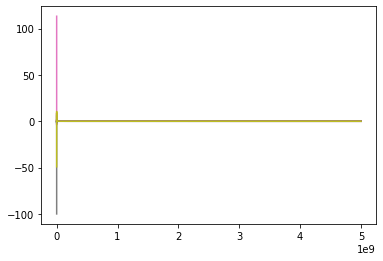

In [48]:
ax = plt.gca() # nesne

ax.plot(lambdalar, katsayılar) # her bir lambda degerine karşılık gelen kat sayı görseli

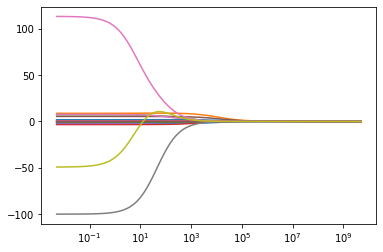

In [53]:
ax = plt.gca() # nesne

ax.plot(lambdalar, katsayılar) # her bir lambda degerine karşılık gelen kat sayı görseli
ax.set_xscale("log") #olçek değiştirme hepsini gözlemlemek için

plt.show()

# TAHMİN

In [54]:
ridge_model = Ridge() 

In [56]:
ridge_model #alpha = 1

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [57]:
ridge_model =Ridge().fit(x_train ,y_train) #burada model oluşturuyoruz yani ortalamaları algoritmalara göre alıyor

In [62]:
y_pred = ridge_model.predict(x_train) 
#egitim setimizi burda test edip tahminde bulunduk


In [66]:
y_pred[:10] #tahminedilen maaş

array([ 376.25245449,  803.38498121,  496.17669652,  112.69554648,
        427.60020221, 1003.6309402 ,  153.45713944,  361.33880956,
        483.29143665,  916.91439669])

In [68]:
y_train[:10] #gercek maaslar

183     125.0
229    1940.0
286     940.0
102     375.0
153     100.0
320     960.0
135      90.0
213     100.0
308     750.0
161     657.0
Name: Salary, dtype: float64

In [70]:
# train hatası 
RMSE = np.sqrt(mean_squared_error(y_train ,y_pred)) #hata kareler ortalamasının karekökü
RMSE

289.34470696006565

In [83]:
#k-katlı çapraz dogrulama yöntemi ile
np.sqrt(np.mean(-cross_val_score(ridge_model , x_train ,y_train , cv =10 ,scoring = "neg_mean_squared_error")))

NameError: name 'cross_val_score' is not defined

In [84]:
# test hatas 
y_pred = ridge_model.predict(x_test)

In [85]:
RMSE = np.sqrt(mean_squared_error(y_test ,y_pred))
RMSE

356.808290573023

In [86]:
# Model Turning 

In [87]:
ridge_model = Ridge().fit(x_train , y_train)
y_pred = ridge_model.predict(x_test) # tahmin oluştur
np.sqrt(mean_squared_error(y_test , y_pred))


356.808290573023

In [88]:
lambdalar1 = np.random.randint(0 ,1000 ,100)

In [89]:
lambdalar2 = 10*np.linspace(10 ,-2 ,100) * 0.5


In [91]:
ridgecv = RidgeCV(alphas = lambdalar2 ,scoring = "neg_mean_squared_error" ,cv =10 ,normalize = True )

In [92]:
ridgecv.fit(x_train , y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RidgeCV(alphas=array([ 50.        ,  49.39393939,  48.78787879,  48.18181818,
        47.57575758,  46.96969697,  46.36363636,  45.75757576,
        45.15151515,  44.54545455,  43.93939394,  43.33333333,
        42.72727273,  42.12121212,  41.51515152,  40.90909091,
        40.3030303 ,  39.6969697 ,  39.09090909,  38.48484848,
        37.87878788,  37.27272727,  36.66666667,  36.06060606,
        35.45454545,  34.84848485,  34.24242424,  33.63636364,
        33...
         3.93939394,   3.33333333,   2.72727273,   2.12121212,
         1.51515152,   0.90909091,   0.3030303 ,  -0.3030303 ,
        -0.90909091,  -1.51515152,  -2.12121212,  -2.72727273,
        -3.33333333,  -3.93939394,  -4.54545455,  -5.15151515,
        -5.75757576,  -6.36363636,  -6.96969697,  -7.57575758,
        -8.18181818,  -8.78787879,  -9.39393939, -10.        ]),
        cv=10, fit_intercept=True, gcv_mode=None, normalize=True,
        scoring='neg_mean_squared_error', store_cv_values=False)

In [94]:
ridgecv.alpha_ # optimum alpha degeri 

0.9090909090909083

In [95]:
# final 

In [99]:
rid_tuned = Ridge(alpha = ridgecv.alpha_).fit(x_train , y_train) #alpha sabitini girerek modelledik

In [102]:
y_pred = rid_tuned.predict(x_test) #tahmin ettik
np.sqrt(mean_squared_error(y_test ,y_pred))   # hata kareler ortalamasını aldık

356.8266733586041